## 로이터 데이터셋

1986년에 로이터에서 공개한 짧은 뉴스 기사와 토픽의 집합인 로이터 데이터셋을 사용하겠습니다. 이 데이터셋은 텍스트 분류를 위해 널리 사용되는 간단한 데이터셋입니다. 46개의 토픽이 있으며 어떤 토픽은 다른 것에 비해 데이터가 많습니다. 각 토픽은 훈련 세트에 최소한 10개의 샘플을 가지고 있습니다.


In [ ]:
from tensorflow.keras.datasets import reuters

(train_data,train_label),(test_data,test_label)=reuters.load_data(num_words=10000)

2121728/2110848 [==============================] - 0s 0us/step


In [ ]:
print(train_data.shape,test_data.shape)

(8982,) (2246,)


In [ ]:
import pandas as pd
pd.Series(train_label).value_counts()

3     3159
4     1949
19     549
16     444
1      432
11     390
20     269
13     172
8      139
10     124
9      101
21     100
25      92
2       74
18      66
24      62
0       55
34      50
12      49
36      49
28      48
6       48
30      45
23      41
31      39
17      39
40      36
32      32
41      30
14      26
39      24
26      24
43      21
15      20
37      19
38      19
29      19
45      18
5       17
7       16
27      15
22      15
42      13
44      12
33      11
35      10
dtype: int64

In [ ]:
word_index=reuters.get_word_index()

565248/550378 [==============================] - 0s 0us/step


In [ ]:
reverse_word_index=dict([(value,key) for (key,value) in word_index.items()])

In [ ]:
print(sorted(reverse_word_index.items()))

[(1, 'the'), (2, 'of'), (3, 'to'), (4, 'in'), (5, 'said'), (6, 'and'), (7, 'a'), (8, 'mln'), (9, '3'), (10, 'for'), (11, 'vs'), (12, 'dlrs'), (13, 'it'), (14, 'reuter'), (15, '000'), (16, '1'), (17, 'pct'), (18, 'on'), (19, 'from'), (20, 'is'), (21, 'that'), (22, 'its'), (23, 'cts'), (24, 'by'), (25, 'at'), (26, 'year'), (27, 'be'), (28, 'with'), (29, '2'), (30, 'will'), (31, 'was'), (32, 'billion'), (33, 'he'), (34, 'u'), (35, 's'), (36, 'net'), (37, 'has'), (38, 'would'), (39, 'an'), (40, 'as'), (41, '5'), (42, 'not'), (43, 'loss'), (44, '4'), (45, '1986'), (46, 'company'), (47, 'which'), (48, 'but'), (49, 'this'), (50, 'shr'), (51, 'last'), (52, 'are'), (53, 'lt'), (54, 'have'), (55, 'or'), (56, '6'), (57, 'bank'), (58, '7'), (59, 'were'), (60, '8'), (61, 'had'), (62, 'oil'), (63, 'trade'), (64, 'share'), (65, 'one'), (66, 'about'), (67, '0'), (68, 'inc'), (69, '9'), (70, 'new'), (71, 'profit'), (72, 'also'), (73, 'market'), (74, 'they'), (75, 'two'), (76, 'shares'), (77, 'stock'), 

In [ ]:
decoded_newswire=' '.join([reverse_word_index.get(i-3,'?')for i in train_data[0]])

In [ ]:
print(train_data[0])

[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


In [ ]:
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [ ]:
import numpy as np

def vectorize_sequences(sequences,dimension=10000):
  results=np.zeros((len(sequences),dimension))
  for i, sequence in enumerate(sequences):
    results[i,sequence]=1
  return results
x_train= vectorize_sequences(train_data)
x_test=vectorize_sequences(test_data)

In [ ]:
x_train.shape

(8982, 10000)

In [ ]:
train_label.shape

(8982,)

In [ ]:
def to_one_hot(labels,dimension=46):
  results=np.zeros((len(labels),dimension))
  for i, label in enumerate(labels):
    results[i,label]=1
  return results
one_hot_train_label=to_one_hot(train_label)
one_hot_test_label=to_one_hot(test_label)

In [ ]:
one_hot_train_label.shape

(8982, 46)

In [ ]:
#레이어 여러개
from tensorflow.keras import models,layers

model = models.Sequential()
model.add(layers.Dense(64,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(46,activation='softmax'))

In [ ]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
x_val=x_train[:1000]
partial_x_train=x_train[1000:]
y_val=one_hot_train_label[:1000]
partial_y_train=one_hot_train_label[1000:]

In [ ]:
from keras.utils.data_utils import validate_file
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val,y_val))

Epoch 1/20
16/16 [==============================] - 2s 80ms/step - loss: 2.5764 - accuracy: 0.4776 - val_loss: 1.7401 - val_accuracy: 0.6320
Epoch 2/20
16/16 [==============================] - 2s 104ms/step - loss: 1.4301 - accuracy: 0.7023 - val_loss: 1.3176 - val_accuracy: 0.7260
Epoch 3/20
16/16 [==============================] - 1s 55ms/step - loss: 1.0704 - accuracy: 0.7771 - val_loss: 1.1621 - val_accuracy: 0.7640
Epoch 4/20
16/16 [==============================] - 1s 49ms/step - loss: 0.8419 - accuracy: 0.8210 - val_loss: 1.0655 - val_accuracy: 0.7750
Epoch 5/20
16/16 [==============================] - 1s 51ms/step - loss: 0.6691 - accuracy: 0.8616 - val_loss: 1.0001 - val_accuracy: 0.7850
Epoch 6/20
16/16 [==============================] - 1s 50ms/step - loss: 0.5333 - accuracy: 0.8919 - val_loss: 0.9626 - val_accuracy: 0.7900
Epoch 7/20
16/16 [==============================] - 1s 50ms/step - loss: 0.4292 - accuracy: 0.9114 - val_loss: 0.9222 - val_accuracy: 0.8090
Epoch 8/20
1

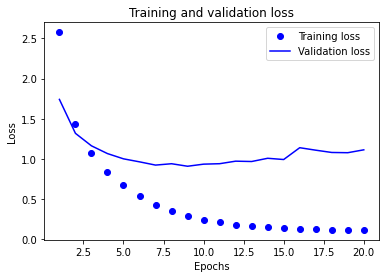

In [ ]:
import matplotlib.pyplot as plt
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(1,len(acc)+1)

plt.plot(epochs, loss, 'bo', label='Training loss')

plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

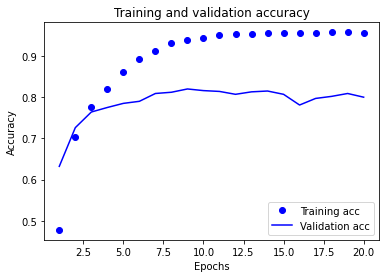

In [ ]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()


plt.show()

In [1]:
model = models.Sequential()
model.add(layers.Dense(64,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(46,activation='softmax'))
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(partial_x_train, partial_y_train,epochs=8,batch_size=512,validation_data=(x_val,y_val))
results = model.evaluate(x_test,one_hot_test_label)
print(results)

NameError: ignored

[과제] 유닛수를 32개, 128개로 조정하고 한개의 은닉층을 세 개의 은닉층으로 변경하여 학습 및 평가 수행한 후 그 차이를 논하세요.

In [ ]:
model = models.Sequential()
model.add(layers.Dense(32,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(32,activation='relu'))
model.add(layers.Dense(32,activation='relu'))
model.add(layers.Dense(32,activation='relu'))
model.add(layers.Dense(46,activation='softmax'))
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(partial_x_train, partial_y_train,epochs=20,batch_size=512,validation_data=(x_val,y_val))
results = model.evaluate(x_test,one_hot_test_label)
print(results)

Epoch 1/20
16/16 [==============================] - 3s 49ms/step - loss: 0.5001 - accuracy: 0.0011 - val_loss: 0.2728 - val_accuracy: 0.0010
Epoch 2/20
16/16 [==============================] - 1s 38ms/step - loss: 0.1830 - accuracy: 0.0754 - val_loss: 0.1236 - val_accuracy: 0.3850
Epoch 3/20
16/16 [==============================] - 1s 39ms/step - loss: 0.1023 - accuracy: 0.3824 - val_loss: 0.0875 - val_accuracy: 0.3900
Epoch 4/20
16/16 [==============================] - 1s 38ms/step - loss: 0.0766 - accuracy: 0.4488 - val_loss: 0.0692 - val_accuracy: 0.4450
Epoch 5/20
16/16 [==============================] - 1s 39ms/step - loss: 0.0625 - accuracy: 0.5558 - val_loss: 0.0588 - val_accuracy: 0.5810
Epoch 6/20
16/16 [==============================] - 1s 38ms/step - loss: 0.0528 - accuracy: 0.6368 - val_loss: 0.0515 - val_accuracy: 0.6460
Epoch 7/20
16/16 [==============================] - 1s 38ms/step - loss: 0.0459 - accuracy: 0.6815 - val_loss: 0.0474 - val_accuracy: 0.6490
Epoch 8/20
16

In [ ]:
model = models.Sequential()
model.add(layers.Dense(128,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dense(46,activation='softmax'))
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(partial_x_train, partial_y_train,epochs=20,batch_size=512,validation_data=(x_val,y_val))
results = model.evaluate(x_test,one_hot_test_label)
print(results)

Epoch 1/20
16/16 [==============================] - 2s 92ms/step - loss: 0.2615 - accuracy: 0.2142 - val_loss: 0.0808 - val_accuracy: 0.3580
Epoch 2/20
16/16 [==============================] - 1s 80ms/step - loss: 0.0669 - accuracy: 0.4698 - val_loss: 0.0577 - val_accuracy: 0.5770
Epoch 3/20
16/16 [==============================] - 1s 82ms/step - loss: 0.0498 - accuracy: 0.6343 - val_loss: 0.0510 - val_accuracy: 0.6300
Epoch 4/20
16/16 [==============================] - 1s 81ms/step - loss: 0.0414 - accuracy: 0.6919 - val_loss: 0.0413 - val_accuracy: 0.6990
Epoch 5/20
16/16 [==============================] - 1s 81ms/step - loss: 0.0348 - accuracy: 0.7355 - val_loss: 0.0368 - val_accuracy: 0.7250
Epoch 6/20
16/16 [==============================] - 1s 81ms/step - loss: 0.0291 - accuracy: 0.7878 - val_loss: 0.0374 - val_accuracy: 0.7470
Epoch 7/20
16/16 [==============================] - 1s 80ms/step - loss: 0.0242 - accuracy: 0.8287 - val_loss: 0.0347 - val_accuracy: 0.7670
Epoch 8/20
16